# Support Vector Machine Assignment

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix


### Import the admissions data set (admissions.csv).

In [2]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv')
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


## Data Exploration

Before jumping into training a model on the data, let's explore it to get a better sense of the relationships between our features and the target variable.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GRE         400 non-null    int64  
 1   TOEFL       400 non-null    int64  
 2   SchoolRank  400 non-null    int64  
 3   SOP         400 non-null    float64
 4   LOR         400 non-null    float64
 5   GPA         400 non-null    float64
 6   Research    400 non-null    int64  
 7   Admitted    400 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.1 KB


### Call the Pandas `describe()` method on the data frame to get view the average values and variability for each variable.

In [4]:
data.describe()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.617500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.486606
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


### Group the data by the Admitted field and compute the average values for each field.

In [18]:
data.groupby('Admitted').mean()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research
Admitted,,,,,,,
0,307.013072,102.588235,2.261438,2.741830,2.875817,8.087974,0.248366
1,322.874494,110.396761,3.599190,3.807692,3.809717,8.915425,0.732794


### How many students that applied were admitted vs. not admitted? What percentage of students were admitted vs. not admitted? 

In [6]:
data.Admitted.value_counts()

1    247
0    153
Name: Admitted, dtype: int64

In [8]:
admitted_perc = data.Admitted.value_counts()*100/data.Admitted.shape[0]
admitted_perc

1    61.75
0    38.25
Name: Admitted, dtype: float64

### What percent of students with research experience were admitted?

In [56]:
data.Research.value_counts()

1    219
0    181
Name: Research, dtype: int64

In [57]:
data.groupby('Research').sum()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Admitted
Research,,,,,,,
0,56018,18850,457,526.5,554.0,1494.55,66
1,70705,24114,778,833.5,827.0,1945.02,181


In [61]:
data.groupby('Research').sum()['Admitted']*100/data.Research.value_counts()

0    36.464088
1    82.648402
dtype: float64

**82.65% of students with research experience were admitted**

### What percent of students admitted had research experience?

In [58]:
data.groupby('Admitted').sum()#['Research']

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research
Admitted,,,,,,,
0,46973,15696,346,419.5,440.0,1237.46,38
1,79750,27268,889,940.5,941.0,2202.11,181


In [51]:
data.groupby('Admitted').sum()['Research']*100/data.Admitted.value_counts()

0    24.836601
1    73.279352
dtype: float64

**73.28% of students admitted had research experience**

### Generate a grouped bar chart showing the number of admissions by SOP score, with separate bars for admitted and not admitted.

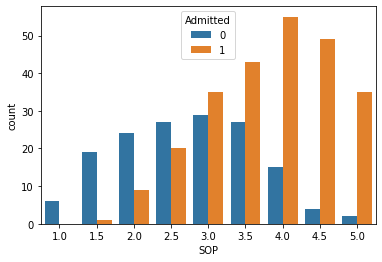

In [69]:
sns.countplot(x="SOP", hue="Admitted", data=data)
plt.show()

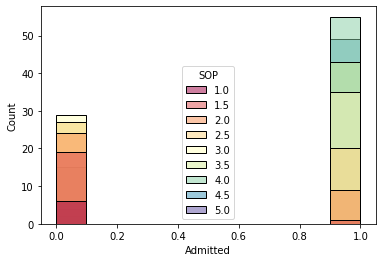

In [75]:
sns.histplot(data=data, x='Admitted', hue='SOP', palette='Spectral')
plt.show()

### Generate a grouped bar chart showing the number of admissions by LOR score, with separate bars for admitted and not admitted.

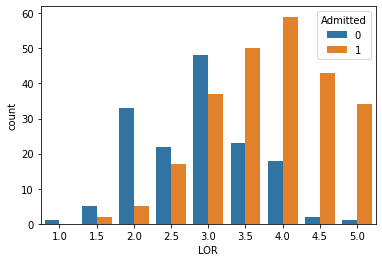

In [71]:
sns.countplot(x="LOR", hue="Admitted", data=data)
plt.show()

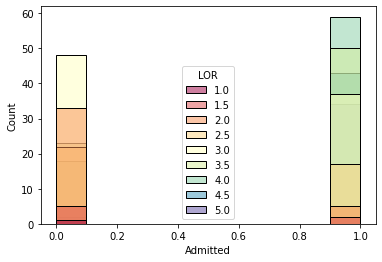

In [76]:
sns.histplot(data=data, x='Admitted', hue='LOR', palette='Spectral')
plt.show()

### Generate a scatter plot where the axes are GRE and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

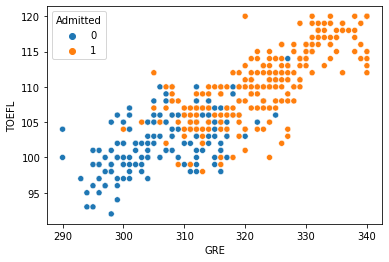

In [82]:
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sns.scatterplot(data=data, x='GRE', y='TOEFL', hue='Admitted', cmap=cmap)
plt.show()

### Generate a scatter plot where the axes are GPA and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

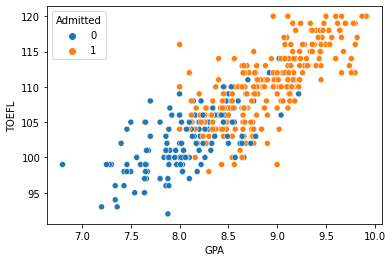

In [83]:
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sns.scatterplot(data=data, x='GPA', y='TOEFL', hue='Admitted', cmap=cmap)
plt.show()

### Generate a scatter plot where the axes are GRE and GPA fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

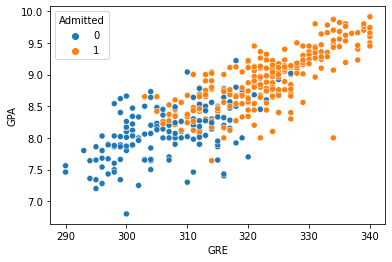

In [84]:
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sns.scatterplot(data=data, x='GRE', y='GPA', hue='Admitted', cmap=cmap)
plt.show()

## Model Training and Evaluation

Now that we have gained a sense of familiarity with our data, let's train a model to predict admissions.

### Split the data into a training and test sets, where the test set contains 20% of the data.

In [85]:
X = data.drop('Admitted', 1)
y = data.Admitted

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Use the linear kernel to train a Support Vector Classifier (SVC) model on the training data. Report the scores for both the training and test data.

In [88]:
def get_scores(model, X_train, X_test, y_train, y_test):
  print(f'Training Scores: {model.score(X_train, y_train)}')
  print(f'Test Scores: {model.score(X_test, y_test)}')

In [87]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
get_scores(svm, X_train, X_test, y_train, y_test)

Training Scores: 0.8625
Test Scores: 0.95


### Generate a classification report for the SVC model you trained.

How do the evaluation metrics differ across classes?

In [109]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

In [110]:
print(classification_report(y_train, y_pred_train, labels=[0,1], target_names=['Not Admitted', 'Admitted']))

              precision    recall  f1-score   support

Not Admitted       0.82      0.82      0.82       124
    Admitted       0.89      0.89      0.89       196

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



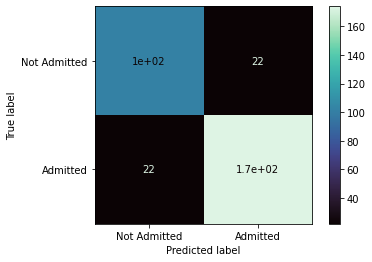

In [112]:
cmap = sns.color_palette("mako", as_cmap=True)
plot_confusion_matrix(svm, X_train, y_train, labels=[0,1], display_labels=['Not Admitted', 'Admitted'], cmap=cmap)
plt.show()

In [94]:
print(classification_report(y_test, y_pred_test, labels=[0,1], target_names=['Not Admitted', 'Admitted']))

              precision    recall  f1-score   support

Not Admitted       0.90      0.97      0.93        29
    Admitted       0.98      0.94      0.96        51

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



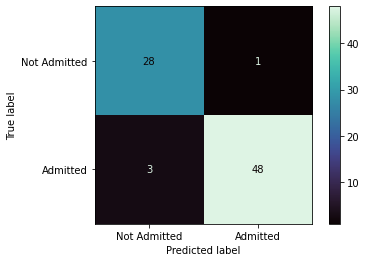

In [108]:
cmap = sns.color_palette("mako", as_cmap=True)
plot_confusion_matrix(svm, X_test, y_test, labels=[0,1], display_labels=['Not Admitted', 'Admitted'], cmap=cmap)
plt.show()

In [122]:
student = np.array([330, 120, 7, 4.2, 1, 7.7, 1]).reshape(1, -1)

In [123]:
svm.predict(student)

array([1])